In [3]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pepsi_data_path = "~/Documents/GitHub/Order-Assistant/food_data_chart.csv"
# Features required 
# Delivered is the previous week delivery
# Delivery is the required prediction value
features = [
    'Begin', 
    'Used', 
    'Delivered', 
    'AvgTempC', 
    'Delivery'
    ]

pepsi_data = pd.read_csv(pepsi_data_path)
pepsi_data = pepsi_data[features]
print(pepsi_data.head())
print(pepsi_data.shape[0])

   Begin  Used  Delivered   AvgTempC  Delivery
0   34.0  29.0        0.0  20.142857      48.0
1    5.0  28.0       48.0  18.142857       0.0
2   25.0   5.0        0.0  14.142857       0.0
3   20.0   0.0        0.0  13.571429       0.0
4   20.0  20.0        0.0   9.857143      72.0
100


In [5]:
pepsi_data = pepsi_data.dropna(axis=0)
print(pepsi_data.count())

Begin        94
Used         94
Delivered    94
AvgTempC     94
Delivery     94
dtype: int64


In [6]:
# Split the data set into training and test sets 
pepsi_features = pepsi_data.copy()
pepsi_delivery = pepsi_features.pop('Delivery')

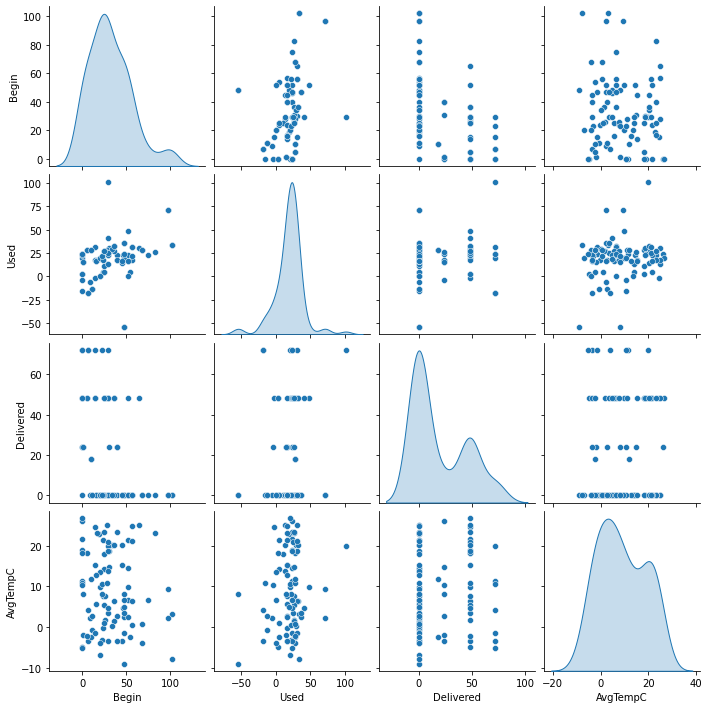

In [7]:
# visualize the data sets to see relationships between features
sns.pairplot(pepsi_features[['Begin', 'Used', 'Delivered', 'AvgTempC']], diag_kind='kde')

In [8]:
pepsi_features = np.array(pepsi_features)

# Split off prediction data 
pepsi_model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])

pepsi_model.compile(loss = tf.losses.MeanSquaredError(), optimizer = tf.optimizers.Adam())


In [11]:
pepsi_model.fit(np.asarray(pepsi_features).astype('float32'), pepsi_delivery, epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 1ms/step - loss: 650.4052
Epoch 2/100
3/3 [==============================] - 0s 1ms/step - loss: 646.5723
Epoch 3/100
3/3 [==============================] - 0s 1ms/step - loss: 642.1727
Epoch 4/100
3/3 [==============================] - 0s 1ms/step - loss: 637.1788
Epoch 5/100
3/3 [==============================] - 0s 1ms/step - loss: 633.0476
Epoch 6/100
3/3 [==============================] - 0s 891us/step - loss: 629.1547
Epoch 7/100
3/3 [==============================] - 0s 885us/step - loss: 627.1002
Epoch 8/100
3/3 [==============================] - 0s 916us/step - loss: 624.8678
Epoch 9/100
3/3 [==============================] - 0s 705us/step - loss: 624.4537
Epoch 10/100
3/3 [==============================] - 0s 704us/step - loss: 623.0579
Epoch 11/100
3/3 [==============================] - 0s 739us/step - loss: 621.3757
Epoch 12/100
3/3 [==============================] - 0s 689us/step - loss: 619.7184
Epoch 13/100
3/3 [=====